In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
# Load the data 
df = pd.read_csv("data.csv")
mycolumn = ['Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth','y']
donne1 = df[mycolumn]
donne1
donne1.head()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
0,19,2,2,3,3,2,2,3,1
1,22,3,3,3,4,4,3,4,0
2,18,3,4,3,3,3,4,4,0
3,20,3,3,3,3,4,3,3,0
4,19,2,3,3,3,4,3,2,1


In [2]:
# Define the calculate entropy function
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)) 
                        for i in range(len(classes))])
    return entropy_value


In [3]:
# Define the calculate information gain function
def calculate_information_gain(dataset,feature,label): 
    # Calculate the dataset entropy
    dataset_entropy = calculate_entropy(dataset[label])   
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    
    # Calculate the weighted feature entropy                                # Call the calculate_entropy function
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                              ==values[i]).dropna()[label]) for i in range(len(values))])    
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

In [4]:
# Set the features and label
features = donne1.columns[:-1]
label = 'Age'
parent=None
features

Index(['Age', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness',
       'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence',
       'GoodPhysicalHealth'],
      dtype='object')

In [5]:
#Define the create decision tree function
def create_decision_tree(dataset, df, features, label, parent):
    datum = np.unique(df[label], return_counts = True)
    unique_data = np.unique(dataset[label])
    if len(unique_data) <=1:
        return unique_data[0]
    elif len(dataset)==0:
        return unique_data[np.argmax(datum[1])]
    elif len(features)==0:
        return parent
    else:
        parent = unique_data[np.argmax(datum[1])]
        #Call the calculate information_gain function
        item_values = [calculate_information_gain(dataset, feature, label) for feature in features]
        for value in np.unique(dataset[optimum_features]):
            min_data = dataset.where(dataset[optimum_feature]==value).dropna()
            #Recursive call create_decision_tree function
            min_tree = create_decision_tree(min_data, df, features, label, parent)
            decision_tree[optimum_feature][value] = min_tree
        return (decision_tree)

In [6]:
# Train the decision tree model
decision_tree = create_decision_tree(donne1,donne1,features,label,parent)

NameError: name 'optimum_features' is not defined

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Load the data 
df = pd.read_csv("data.csv")
mycolumn = ['EducationSector','Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance','StrongNeedToAchieve','SelfConfidence','GoodPhysicalHealth','y']
donne1 = df[mycolumn]
donne1.head()
donne1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   Age                     219 non-null    int64 
 2   Perseverance            219 non-null    int64 
 3   DesireToTakeInitiative  219 non-null    int64 
 4   Competitiveness         219 non-null    int64 
 5   SelfReliance            219 non-null    int64 
 6   StrongNeedToAchieve     219 non-null    int64 
 7   SelfConfidence          219 non-null    int64 
 8   GoodPhysicalHealth      219 non-null    int64 
 9   y                       219 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 17.2+ KB


In [8]:
donne1.shape

(219, 10)

In [9]:
df.isnull().any()

EducationSector           False
IndividualProject         False
Age                       False
Gender                    False
City                      False
Influenced                False
Perseverance              False
DesireToTakeInitiative    False
Competitiveness           False
SelfReliance              False
StrongNeedToAchieve       False
SelfConfidence            False
GoodPhysicalHealth        False
MentalDisorder            False
KeyTraits                 False
ReasonsForLack             True
y                         False
dtype: bool

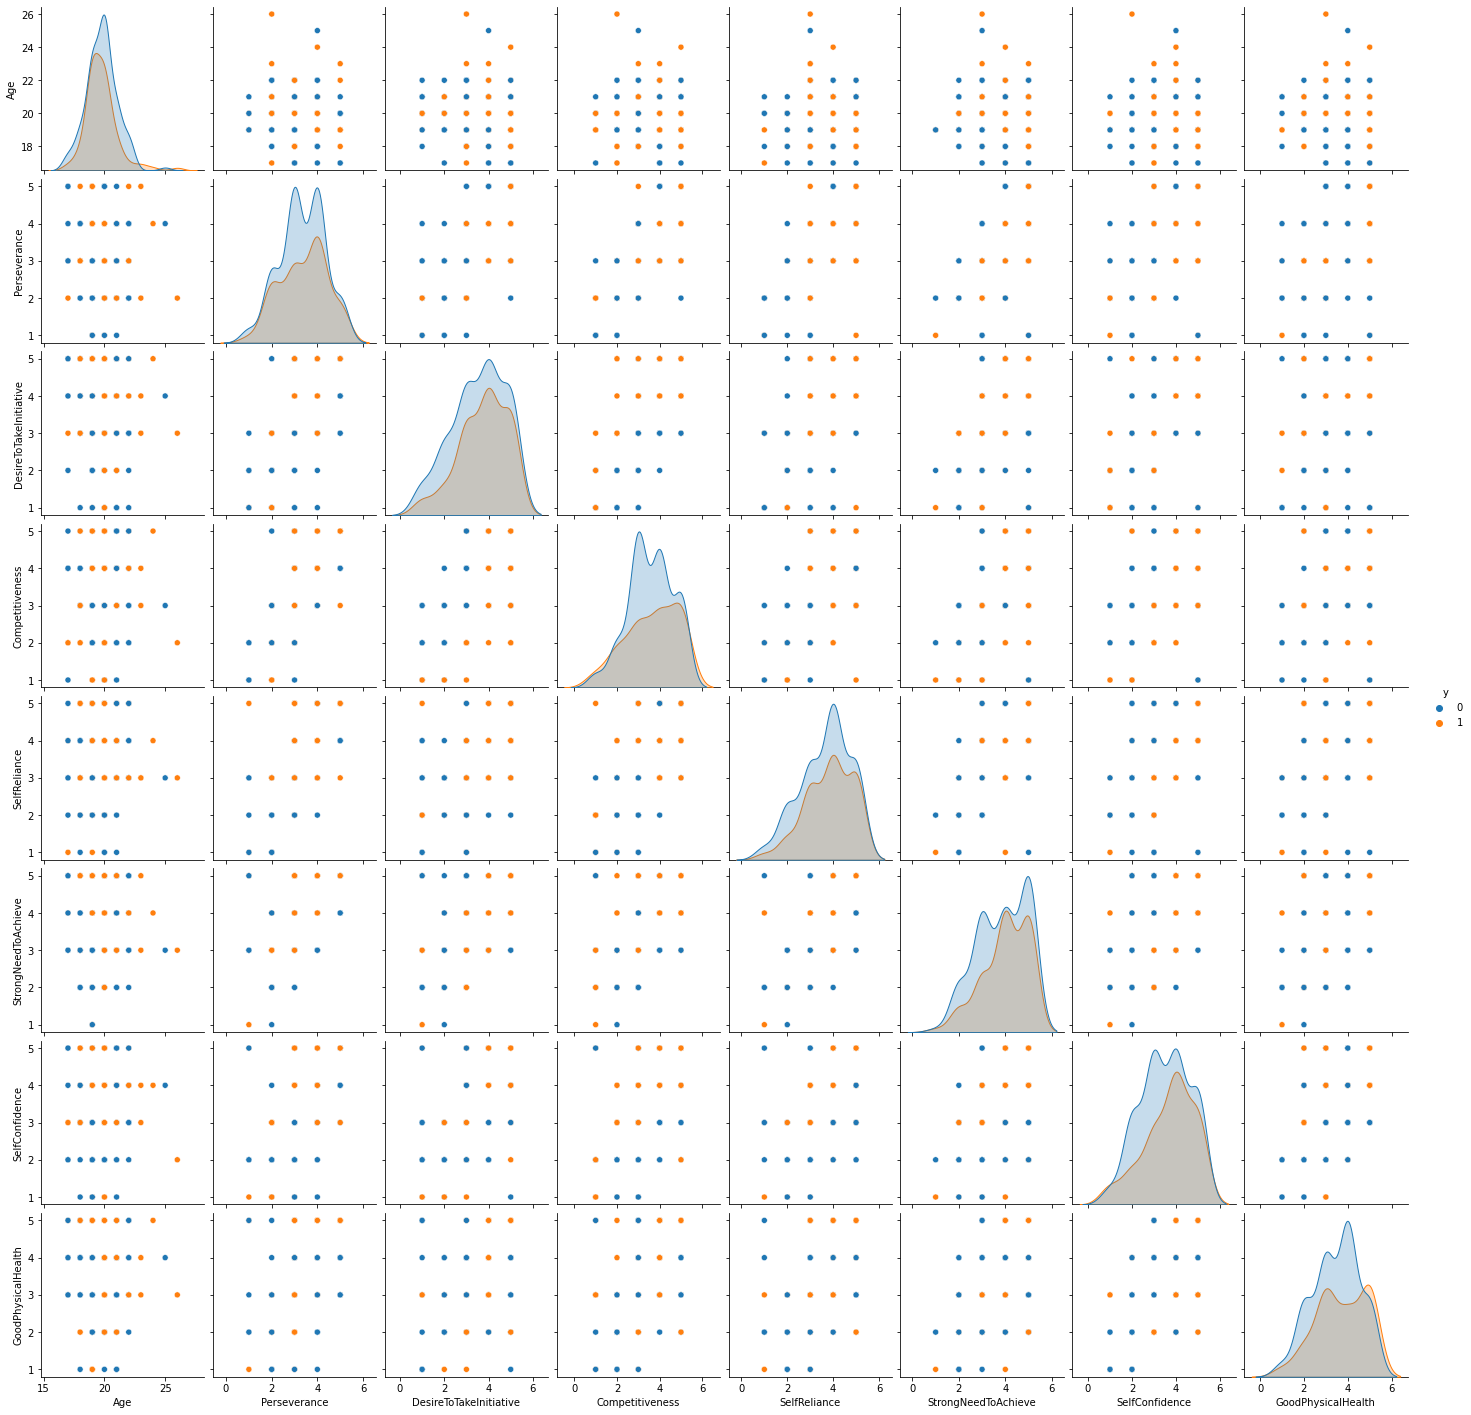

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=donne1, hue = 'y')

In [11]:
from sklearn.model_selection import train_test_split
X = donne1.drop('EducationSector',axis=1)
y = donne1[['EducationSector']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)
#print(X_test)
#print(X_train)
#print(y_test)
#print(y_train)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [13]:
y_predict = clf_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(clf_model.tree_.node_count)


0.5606060606060606
11


In [15]:
target = list(donne1['EducationSector'].unique())
feature_names = list(X.columns)
print(target)
print(feature_names)

['Engineering Sciences', 'Others', 'Economic Sciences, Business Studies, Commerce and Law', 'Art, Music or Design', 'Humanities and Social Sciences', 'Medicine, Health Sciences', 'Teaching Degree (e.g., B.Ed)', 'Mathematics or Natural Sciences', 'Language and Cultural Studies']
['Age', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth', 'y']


In [16]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

#graph = graphviz.Source(dot_data, format="jpg") 
#graph
#graph.render("arbre_decision")


In [17]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- DesireToTakeInitiative <= 1.50
|   |--- Competitiveness <= 1.50
|   |   |--- class: Engineering Sciences
|   |--- Competitiveness >  1.50
|   |   |--- class: Art, Music or Design
|--- DesireToTakeInitiative >  1.50
|   |--- Competitiveness <= 3.50
|   |   |--- Age <= 19.50
|   |   |   |--- class: Engineering Sciences
|   |   |--- Age >  19.50
|   |   |   |--- class: Engineering Sciences
|   |--- Competitiveness >  3.50
|   |   |--- GoodPhysicalHealth <= 4.50
|   |   |   |--- class: Engineering Sciences
|   |   |--- GoodPhysicalHealth >  4.50
|   |   |   |--- class: Engineering Sciences



In [18]:
graph.save('graph1.jpg')
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.pdf'

In [19]:
from sklearn.tree import export_text
print(export_text(clf_model, feature_names=feature_names))

|--- DesireToTakeInitiative <= 1.50
|   |--- Competitiveness <= 1.50
|   |   |--- class: Engineering Sciences
|   |--- Competitiveness >  1.50
|   |   |--- class: Art, Music or Design
|--- DesireToTakeInitiative >  1.50
|   |--- Competitiveness <= 3.50
|   |   |--- Age <= 19.50
|   |   |   |--- class: Engineering Sciences
|   |   |--- Age >  19.50
|   |   |   |--- class: Engineering Sciences
|   |--- Competitiveness >  3.50
|   |   |--- GoodPhysicalHealth <= 4.50
|   |   |   |--- class: Engineering Sciences
|   |   |--- GoodPhysicalHealth >  4.50
|   |   |   |--- class: Engineering Sciences



In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.tree_.node_count

171

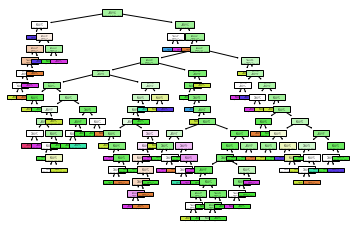

AttributeError: 'NoneType' object has no attribute 'set_size_inches'

In [21]:
tree.plot_tree(clf, filled=True)
plt.show().set_size_inches(3, 3)
#plt.show().figure(figsize=(10,20))
#plt.show()

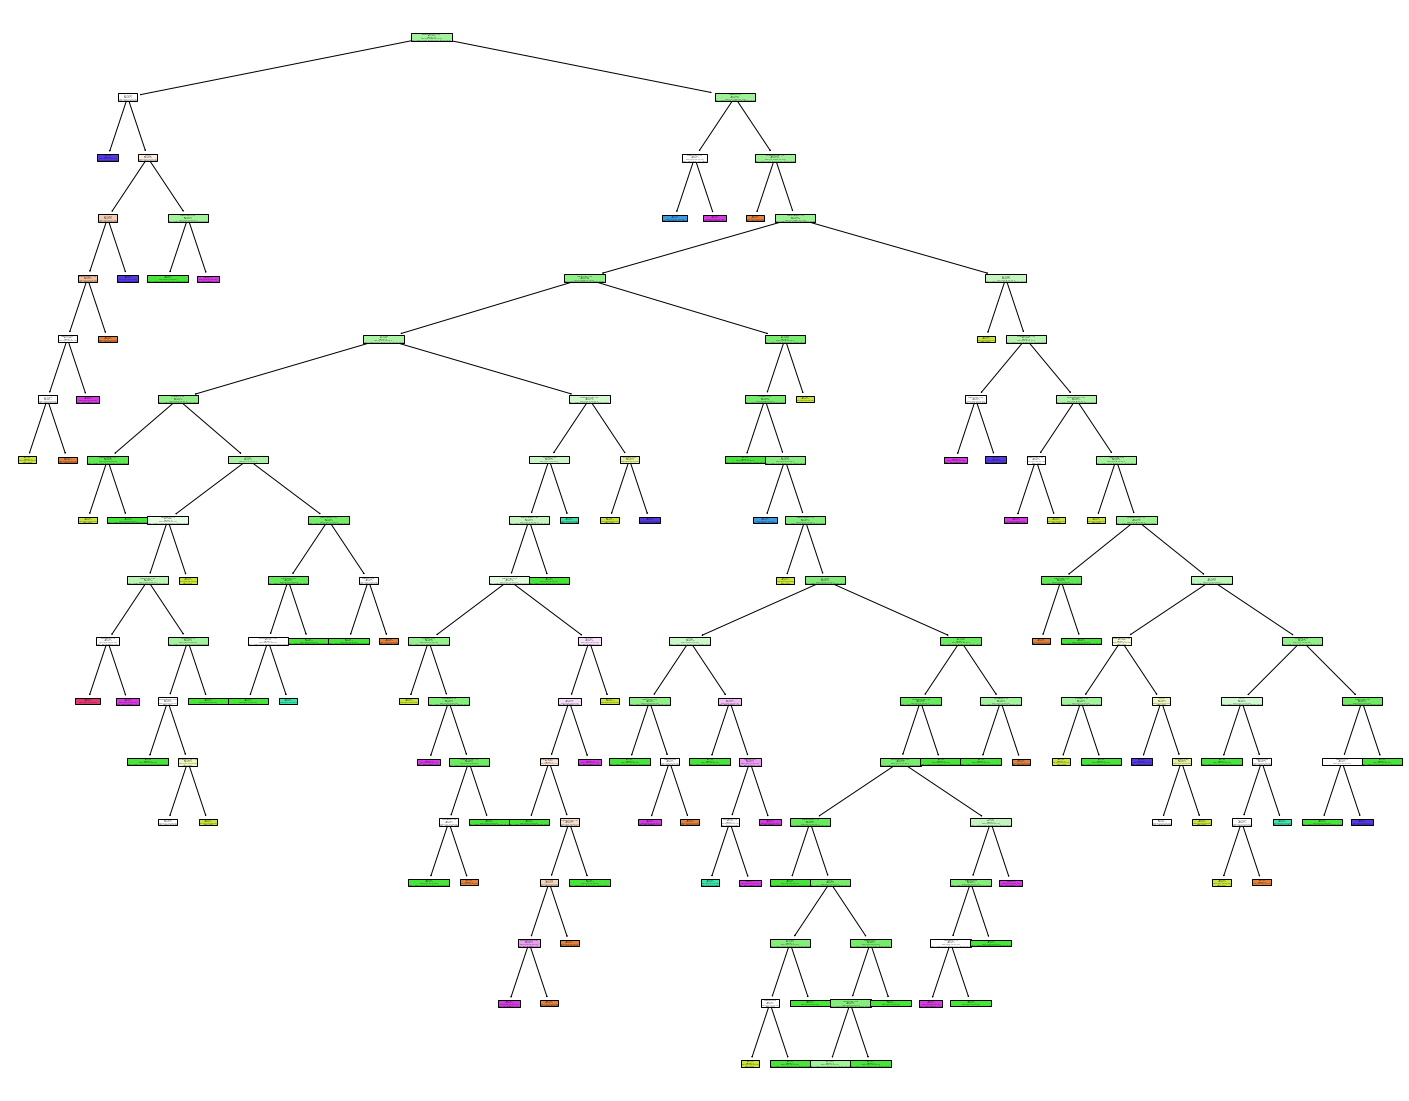

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target,
                   filled=True)
plt.show()
fig.savefig("decistion_tree.png")

In [23]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph
graph.render("decision_tree1")

'decision_tree1.jpg'

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_dict= {'ccp_alpha':np.linspace(0.0, 10, 200), 'criterion':['gini', 'entropy']}
grid=GridSearchCV(DecisionTreeClassifier(), param_grid=param_dict, cv=2)
grid.fit(X_train, y_train)
grid.estimator.get_params().keys
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [25]:
grid.best_score_

0.5621155160628845

In [26]:
grid.best_params_

{'ccp_alpha': 0.05025125628140704, 'criterion': 'gini'}

In [27]:
final_model=DecisionTreeClassifier(ccp_alpha=0.05025125628140704)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05025125628140704)

In [28]:
final_model.score(X_test, y_test)

0.5606060606060606

In [29]:
final_model.tree_.node_count

1

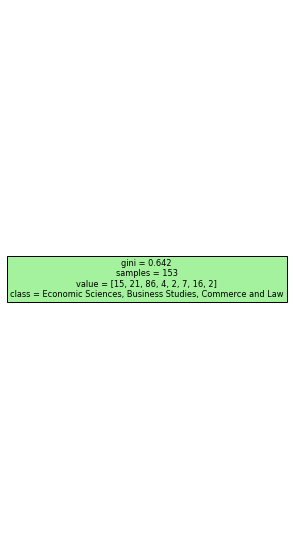

In [30]:
fig = plt.figure(figsize=(5,10))
_ = tree.plot_tree(final_model, 
                   feature_names=feature_names,  
                   class_names=target,
                   filled=True)
plt.show()

In [31]:
from sklearn.tree import export_text
print(export_text(final_model, feature_names=feature_names))

|--- class: Engineering Sciences

